# Qiskit

https://qiskit.org/advocates/

https://www.youtube.com/watch?v=WYAUh-4K5E0

https://pennylane.ai/

IBM quantum challenge fall

https://challenges.quantum-computing.ibm.com/fall-2021

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import qiskit
import numpy as np

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

In [4]:
qc = QuantumCircuit(2)

In [5]:
qc.x(0)

In [6]:
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────

In [7]:
# rotation degree
qc.rx(np.pi / 4, 1)

In [8]:
sv = Statevector(qc)
qc.draw()

┌───┐   
q_0: ───┤ X ├───
     ┌──┴───┴──┐
q_1: ┤ Rx(π/4) ├
     └─────────┘

/home/noroboto/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


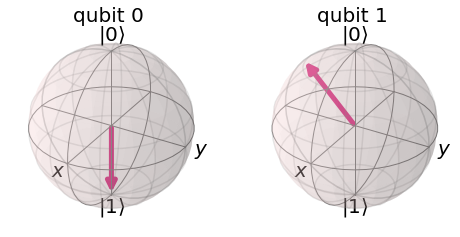

In [9]:
plot_bloch_multivector(sv)

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
sv0 = Statevector(qc)
qc.cx(0, 1)
sv1 = Statevector(qc)

/home/noroboto/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


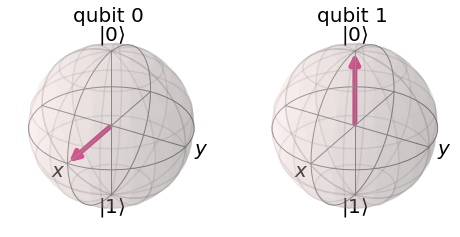

In [11]:
plot_bloch_multivector(sv0)

/home/noroboto/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


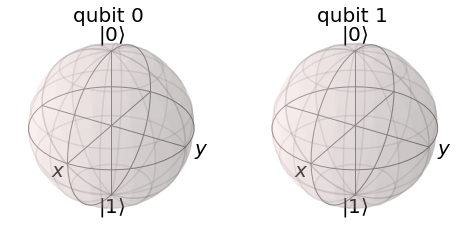

In [12]:
plot_bloch_multivector(sv1)

In [13]:
# Entanglement!!,  collapse of the wave function

In [14]:
from qiskit.visualization import plot_state_qsphere

/home/noroboto/anaconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


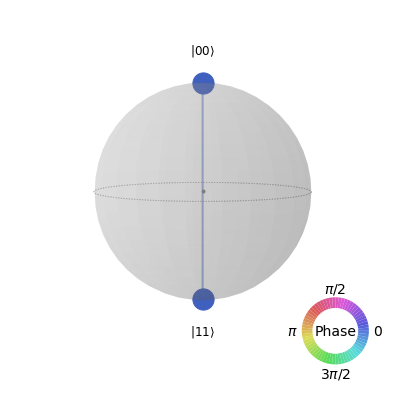

In [15]:
plot_state_qsphere(sv1)

In [16]:
qc = QuantumCircuit(2, 2)
qc.initialize([1 / np.sqrt(2), 0, 0, 1 / np.sqrt(2)])

In [17]:
qc.draw()

┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0.70711,0,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘
c: 2/════════════════════════════════════

In [18]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [1, 0])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                1  0

In [19]:
from qiskit import IBMQ

In [20]:
provider = IBMQ.load_account()

In [21]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [22]:
backend_qasam = provider.get_backend("ibmq_qasm_simulator")

In [23]:
backend_quito = provider.get_backend("ibmq_quito")

In [24]:
job1 = backend_qasam.run(qc, shots = 1000)

In [25]:
job1.job_id()

'616a28bf443f1e17b45fc915'

In [26]:
result =  job1.result()

In [27]:
result.get_counts()

{'00': 476, '11': 524}

In [28]:
from qiskit.visualization import plot_histogram

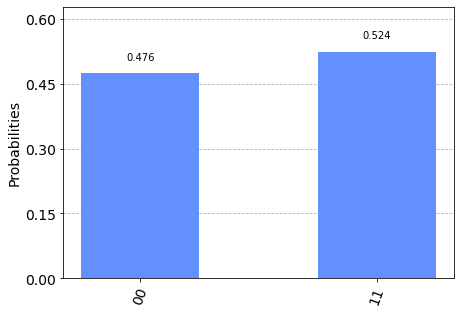

In [29]:
plot_histogram(result.get_counts())

In [30]:
job2 = backend_quito.run(qc, shots=2000)

In [31]:
# due H is not available on current hardware (simulator) it's necessary transpile.

In [32]:
from qiskit import transpile

In [33]:
qcT = transpile(qc, backend_quito)

In [34]:
qcT.draw()

/home/noroboto/anaconda3/envs/qiskit/lib/python3.9/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


global phase: π/4
               ┌─────────┐┌────┐┌─────────┐        ┌─┐
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■─────┤M├
               └─────────┘└────┘└─────────┘┌─┴─┐┌─┐└╥┘
      q_1 -> 1 ────────────────────────────┤ X ├┤M├─╫─
                                           └───┘└╥┘ ║ 
ancilla_0 -> 2 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_1 -> 3 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
ancilla_2 -> 4 ──────────────────────────────────╫──╫─
                                                 ║  ║ 
          c: 2/══════════════════════════════════╩══╩═
                                                 0  1

In [35]:
job2 = backend_quito.run(qcT, shots= 1000)

In [36]:
job2.job_id()

'616a28c728af8da8bbf06706'

In [37]:
backend_belen = provider.get_backend('ibmq_belem')

In [38]:
job3 = backend_belen.run(qcT, shots=2000)

In [39]:
job3.job_id()

'616a28c883518ef1ef0b0230'

In [40]:
job3 = backend_belen.retrieve_job("616a246311a3e3c772532bd2")

In [41]:
counts = job3.result().get_counts() 

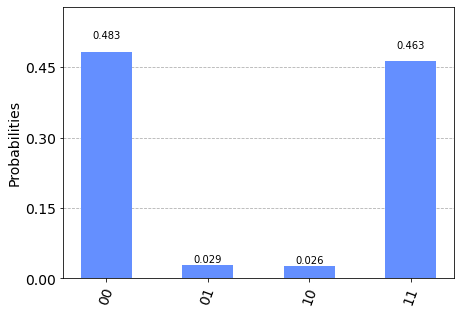

In [42]:
plot_histogram(counts)

In [44]:
# gaussian squares, CR = Cross resonance, just for error reduction.
'''
    from qiskit import schedule
    qt = QuantumCircuit(2)
    qc.cx(0, 1)
    sch = schedule(transpile(cx, backend_belen, ))
    sch.draw()
'''

'\n    from qiskit import schedule\n    qt = QuantumCircuit(2)\n    qc.cx(0, 1)\n    sch = schedule(transpile(cx, backend_belen, ))\n    sch.draw()\n'

In [45]:
from qiskit.quantum_info import DensityMatrix

In [46]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
p = DensityMatrix(qc)

In [47]:
p

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))
